In [ ]:
%pip install gymnasium matplotlib torch

=== TREASURE HUNT DEMONSTRATION ===
The agent (blue) must find the treasure (gold) while avoiding traps (red).
Let's watch a random agent try to solve this problem...

Game reset! Agent is back at the starting position (0,0).

Starting state:


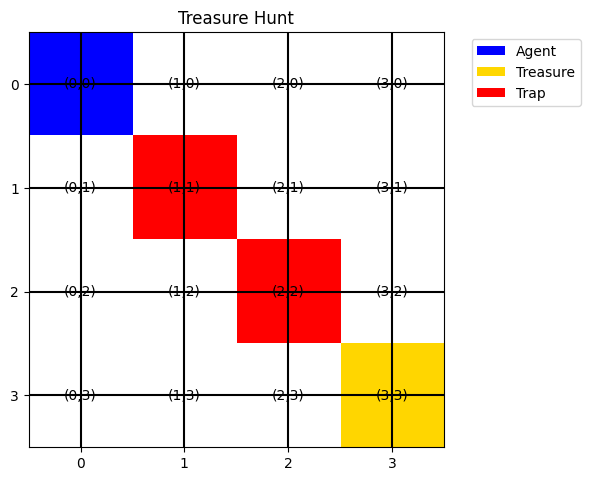


--- STEP 1 ---
Agent moved DOWN from (0, 0) to (0, 1)
Agent took a step (-1 reward)


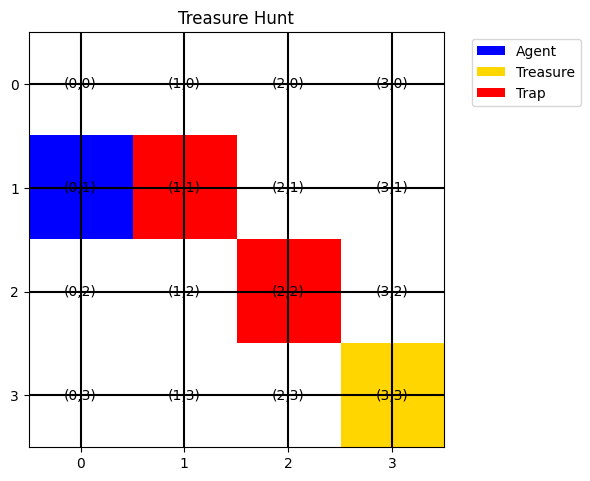


--- STEP 2 ---
Agent tried to move LEFT but hit a wall and stayed at (0, 1)
Agent took a step (-1 reward)


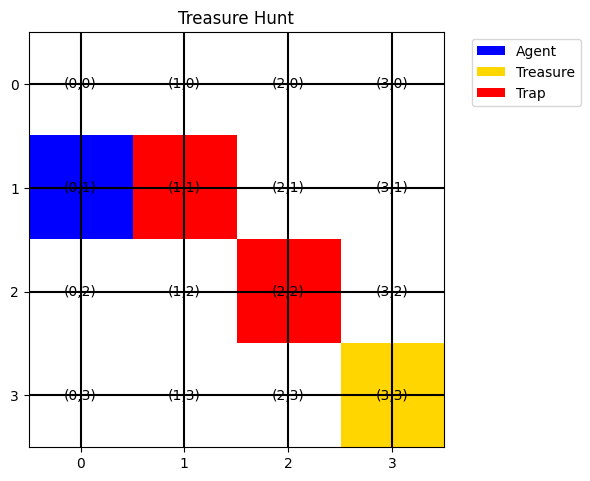


--- STEP 3 ---
Agent moved UP from (0, 1) to (0, 0)
Agent took a step (-1 reward)


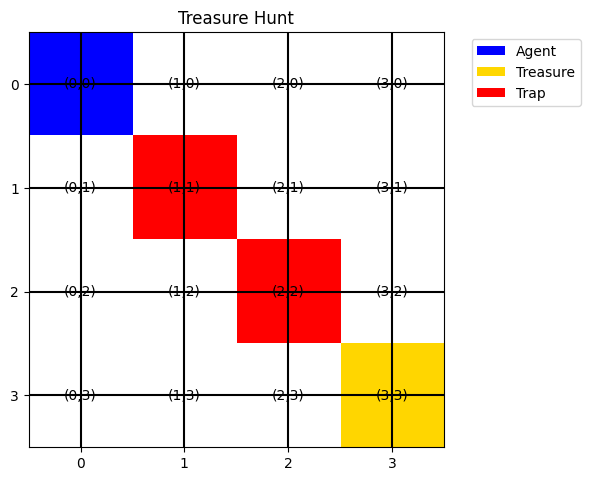


--- STEP 4 ---
Agent moved DOWN from (0, 0) to (0, 1)
Agent took a step (-1 reward)


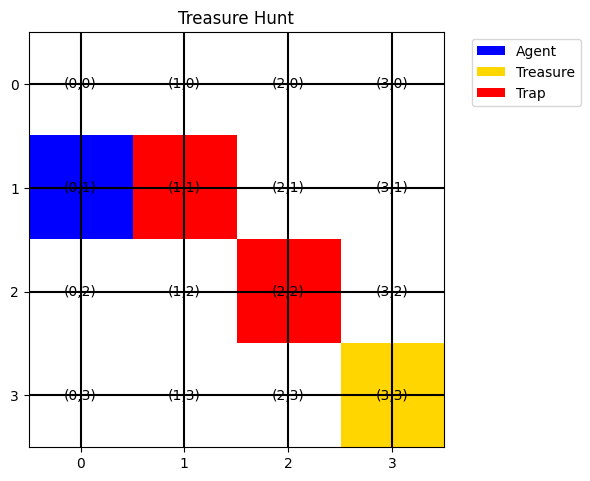


--- STEP 5 ---
Agent moved DOWN from (0, 1) to (0, 2)
Agent took a step (-1 reward)


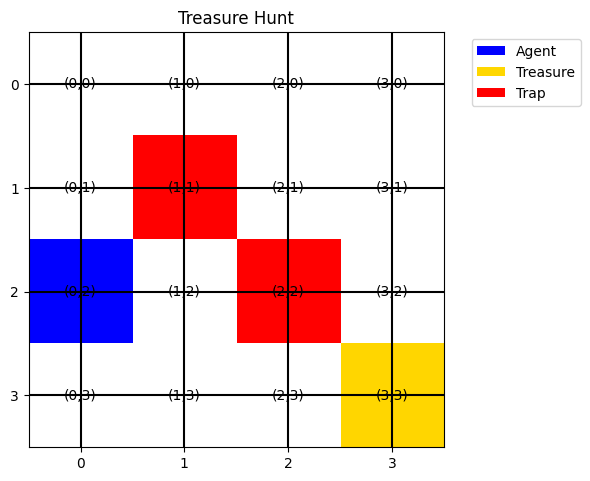


--- STEP 6 ---
Agent tried to move LEFT but hit a wall and stayed at (0, 2)
Agent took a step (-1 reward)


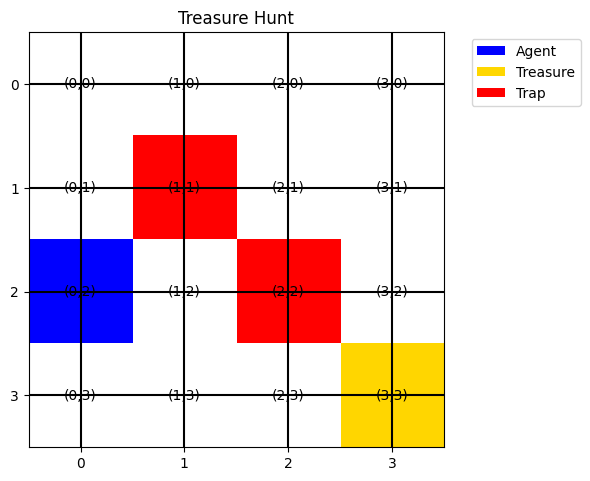


--- STEP 7 ---
Agent moved UP from (0, 2) to (0, 1)
Agent took a step (-1 reward)


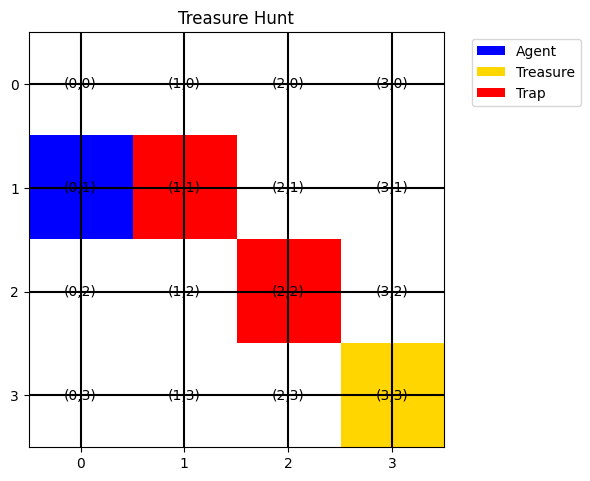


--- STEP 8 ---
Agent moved UP from (0, 1) to (0, 0)
Agent took a step (-1 reward)


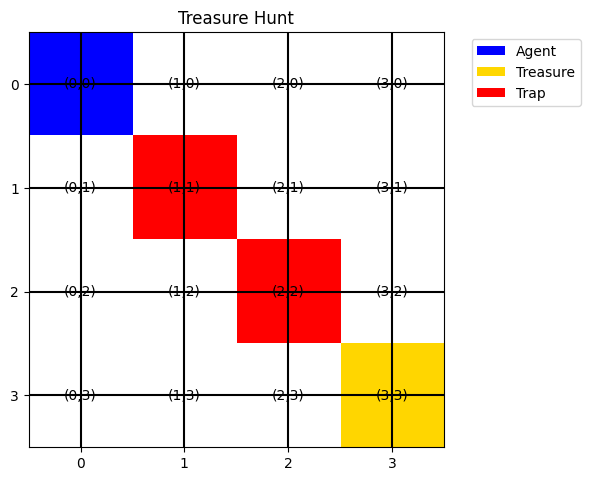


--- STEP 9 ---
Agent moved DOWN from (0, 0) to (0, 1)
Agent took a step (-1 reward)


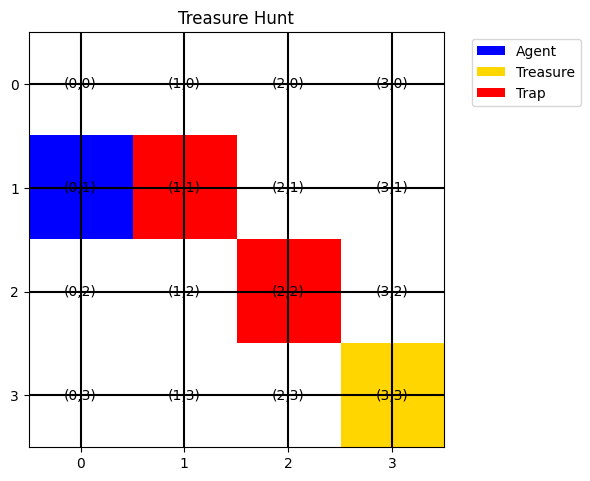


--- STEP 10 ---
Agent moved RIGHT from (0, 1) to (1, 1)
Oh no! Agent fell into a trap! (-10 reward)


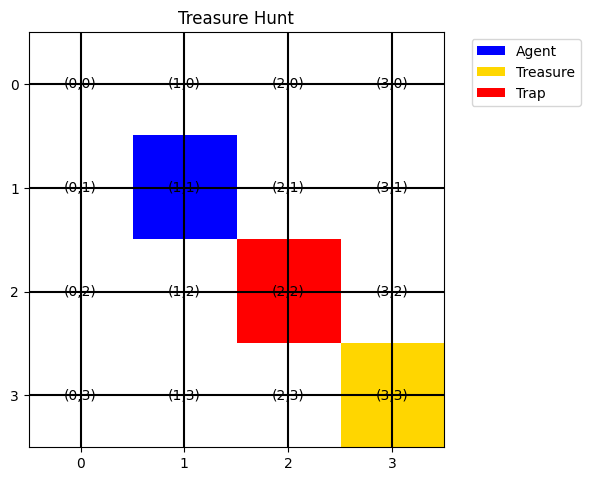


💥 The random agent fell into a trap!

This example shows how an agent interacts with an environment in reinforcement learning.
Instead of random actions, a learning agent would improve its strategy over time.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple treasure hunt environment
class TreasureHunt:
    """
    A simple 4x4 grid world where an agent (blue circle) must find the treasure (gold star)
    while avoiding traps (red squares).
    
    The grid is structured as follows:
        - The agent starts in the top-left corner (0,0)
        - The treasure is in the bottom-right corner (3,3)
        - There are two traps at positions (1,1) and (2,2)
    
    Actions:
        0: Move up
        1: Move right
        2: Move down
        3: Move left
    
    Rewards:
        +10: Finding the treasure (success)
        -10: Falling into a trap (failure)
        -1: Each move (encourages finding the shortest path)
    """
    def __init__(self):
        self.width = 4
        self.height = 4
        self.agent_position = (0, 0)  # Start at top-left corner
        self.treasure_position = (3, 3)  # Treasure at bottom-right corner
        self.traps = [(1, 1), (2, 2)]  # Traps in the middle
        
    def reset(self):
        """Reset the environment to initial state"""
        self.agent_position = (0, 0)
        print("Game reset! Agent is back at the starting position (0,0).")
        return self.agent_position
    
    def step(self, action):
        """
        Take an action and return new state, reward, and whether done
        
        Action meanings:
        0: Move up    (decrease y by 1)
        1: Move right (increase x by 1)
        2: Move down  (increase y by 1)
        3: Move left  (decrease x by 1)
        """
        # Store previous position for explanation
        prev_position = self.agent_position
        x, y = self.agent_position
        
        # Update position based on action
        action_names = ["UP", "RIGHT", "DOWN", "LEFT"]
        if action == 0:  # up
            y = max(0, y-1)
        elif action == 1:  # right
            x = min(self.width-1, x+1)
        elif action == 2:  # down
            y = min(self.height-1, y+1)
        elif action == 3:  # left
            x = max(0, x-1)
            
        # Move agent to new position
        self.agent_position = (x, y)
        
        # Explain what happened
        if self.agent_position == prev_position:
            print(f"Agent tried to move {action_names[action]} but hit a wall and stayed at {self.agent_position}")
        else:
            print(f"Agent moved {action_names[action]} from {prev_position} to {self.agent_position}")
        
        # Determine reward and done flag
        if self.agent_position == self.treasure_position:
            reward = 10  # Big reward for finding the treasure
            done = True
            print("Success! Agent found the treasure! (+10 reward)")
        elif self.agent_position in self.traps:
            reward = -10  # Big penalty for falling into a trap
            done = True
            print("Oh no! Agent fell into a trap! (-10 reward)")
        else:
            reward = -1  # Small penalty for each step (encourages finding shortest path)
            done = False
            print("Agent took a step (-1 reward)")
            
        return self.agent_position, reward, done
    
    def render(self):
        """Visualize the current state of the environment"""
        # Create a colorful grid
        grid = np.ones((self.height, self.width, 3))  # White background
        
        # Mark traps (red)
        for trap in self.traps:
            grid[trap[1], trap[0]] = [1, 0, 0]  # Red color
        
        # Mark treasure (gold)
        grid[self.treasure_position[1], self.treasure_position[0]] = [1, 0.84, 0]  # Gold color
        
        # Mark agent (blue)
        grid[self.agent_position[1], self.agent_position[0]] = [0, 0, 1]  # Blue color
        
        # Display the grid
        plt.figure(figsize=(6, 6))
        plt.imshow(grid)
        plt.grid(True, color='black', linestyle='-', linewidth=1.5)
        plt.xticks(np.arange(self.width))
        plt.yticks(np.arange(self.height))
        
        # Add labels and legend
        plt.title('Treasure Hunt')
        
        # Create legend patches
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='blue', label='Agent'),
            Patch(facecolor='gold', label='Treasure'),
            Patch(facecolor='red', label='Trap')
        ]
        plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Add coordinate labels
        for i in range(self.width):
            for j in range(self.height):
                plt.text(i, j, f"({i},{j})", ha='center', va='center', color='black')
        
        plt.tight_layout()
        plt.show()

# Create an agent that explores randomly
class RandomExplorer:
    """
    A simple agent that chooses random actions to explore the environment.
    This agent doesn't learn - it just helps demonstrate how the environment works.
    """
    def __init__(self):
        self.name = "Random Explorer"
    
    def select_action(self, state):
        """Select a random action (0=up, 1=right, 2=down, 3=left)"""
        return np.random.randint(0, 4)

# Run a demonstration of the treasure hunt
print("=== TREASURE HUNT DEMONSTRATION ===")
print("The agent (blue) must find the treasure (gold) while avoiding traps (red).")
print("Let's watch a random agent try to solve this problem...\n")

env = TreasureHunt()
agent = RandomExplorer()

state = env.reset()
print("\nStarting state:")
env.render()

# Run until treasure is found, trap is hit, or 10 steps are taken
for i in range(10):
    print(f"\n--- STEP {i+1} ---")
    action = agent.select_action(state)
    next_state, reward, done = env.step(action)
    
    state = next_state
    env.render()
    
    if done:
        if reward > 0:
            print("\n🎉 The random agent got lucky and found the treasure!")
        else:
            print("\n💥 The random agent fell into a trap!")
        break

if not done:
    print("\nThe random agent didn't find the treasure or fall into a trap within 10 steps.")
print("\nThis example shows how an agent interacts with an environment in reinforcement learning.")
print("Instead of random actions, a learning agent would improve its strategy over time.")

TREASURE HUNT: SOLVING WITH VALUE ITERATION

In this example, we're finding the optimal path to the treasure using value iteration.
The agent starts anywhere in the grid and must find the best way to reach the goal.

Here's what each cell represents:
- GOAL: The treasure (+10 reward)
- TRAP: A dangerous pit (-10 reward)
- WALL: An obstacle that blocks movement
- Regular cells: Each step costs energy (-1 reward)

We'll use VALUE ITERATION to find the best action to take from each cell.

[INITIAL STATE] All regular cells start with zero values:


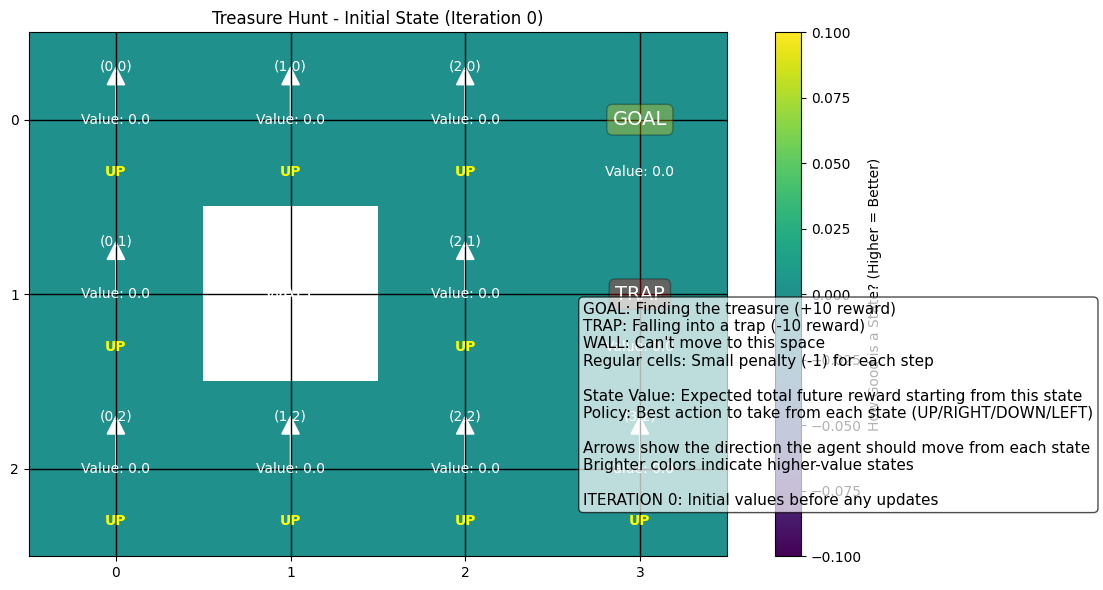


Starting value iteration algorithm...
We'll update each cell's value based on the potential future rewards.


--- ITERATION 1 ---
Updating values for all cells...
Cell (0,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 0.00
    * Total value of this action: -1.00
  - Action RIGHT: Moves to (1,0)
    * Immediate reward: -1, Future value: 0.00
    * Total value of this action: -1.00
  - Action DOWN: Moves to (0,1)
    * Immediate reward: -1, Future value: 0.00
    * Total value of this action: -1.00
  - Action LEFT: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 0.00
    * Total value of this action: -1.00
  All actions evaluated: ['-1.00', '-1.00', '-1.00', '-1.00']
  Best action: UP with value -1.00
  Value updated from 0.00 to -1.00 (change: 1.0000)
Cell (1,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (1,0)
    * Imme

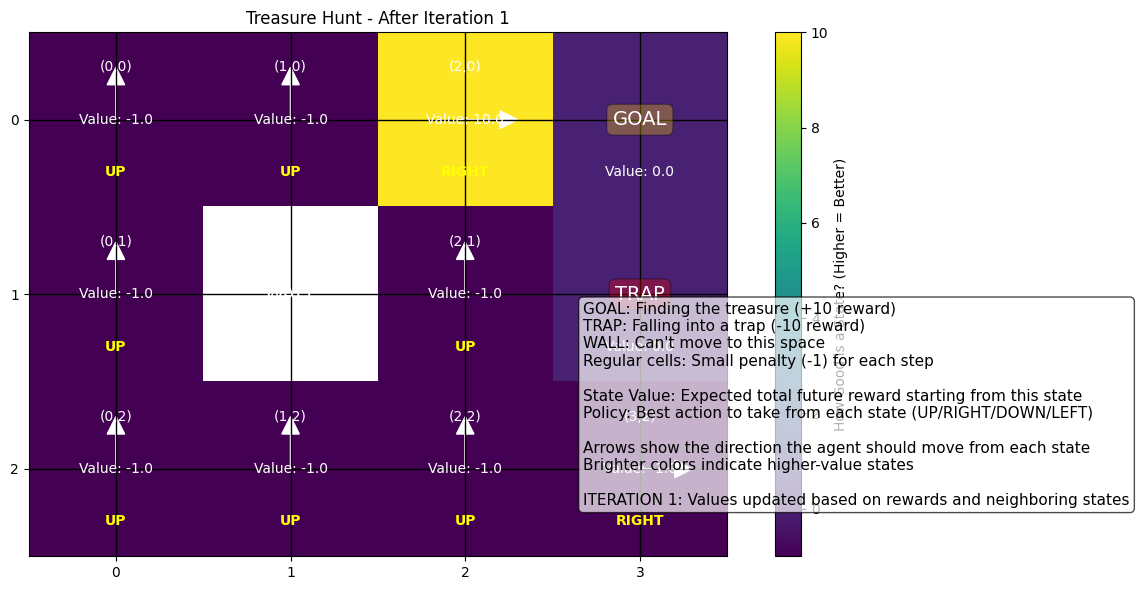


--- ITERATION 2 ---
Updating values for all cells...
Cell (0,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: -0.90
    * Total value of this action: -1.90
  - Action RIGHT: Moves to (1,0)
    * Immediate reward: -1, Future value: -0.90
    * Total value of this action: -1.90
  - Action DOWN: Moves to (0,1)
    * Immediate reward: -1, Future value: -0.90
    * Total value of this action: -1.90
  - Action LEFT: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: -0.90
    * Total value of this action: -1.90
  All actions evaluated: ['-1.90', '-1.90', '-1.90', '-1.90']
  Best action: UP with value -1.90
  Value updated from -1.00 to -1.90 (change: 0.9000)
Cell (1,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (1,0)
    * Immediate reward: -1, Future value: -0.90
    * Total value of this action: -1.90
  - Action RIGHT: Moves to 

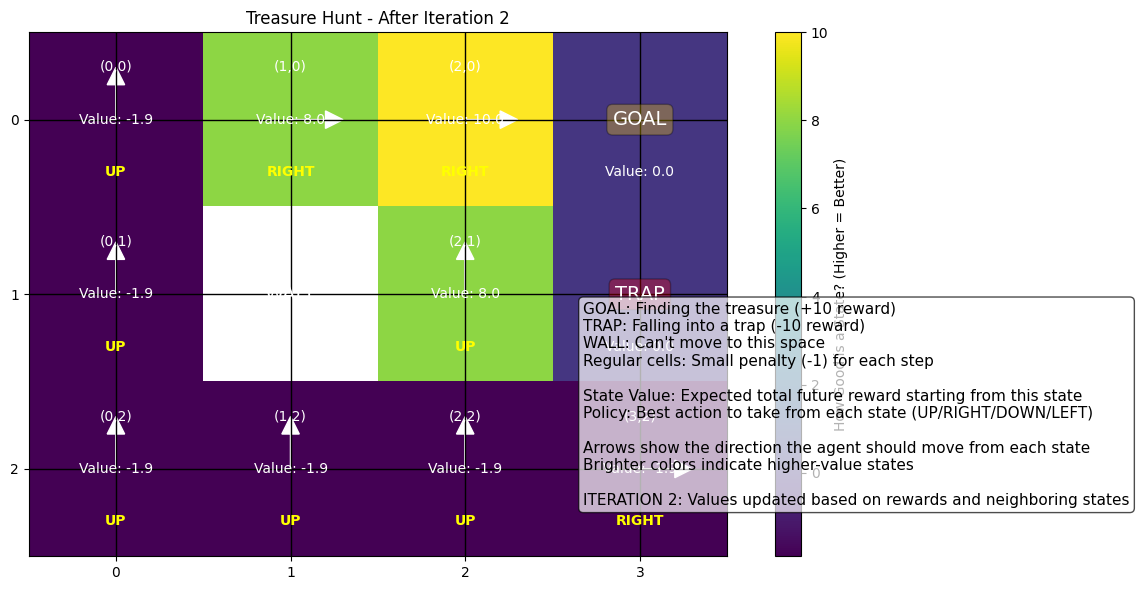


--- ITERATION 3 ---
Updating values for all cells...
Cell (0,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: -1.71
    * Total value of this action: -2.71
  - Action RIGHT: Moves to (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action DOWN: Moves to (0,1)
    * Immediate reward: -1, Future value: -1.71
    * Total value of this action: -2.71
  - Action LEFT: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: -1.71
    * Total value of this action: -2.71
  All actions evaluated: ['-2.71', '6.20', '-2.71', '-2.71']
  Best action: RIGHT with value 6.20
  Value updated from -1.90 to 6.20 (change: 8.1000)
Cell (1,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action RIGHT: Moves to (2,0

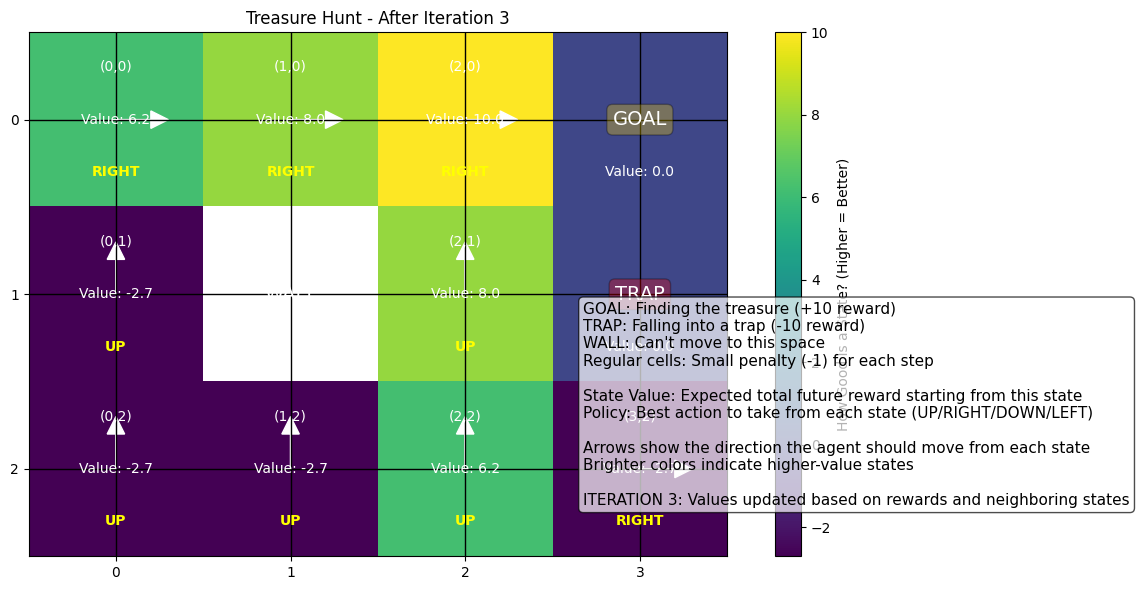


--- ITERATION 4 ---
Updating values for all cells...
Cell (0,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 5.58
    * Total value of this action: 4.58
  - Action RIGHT: Moves to (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action DOWN: Moves to (0,1)
    * Immediate reward: -1, Future value: -2.44
    * Total value of this action: -3.44
  - Action LEFT: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 5.58
    * Total value of this action: 4.58
  All actions evaluated: ['4.58', '6.20', '-3.44', '4.58']
  Best action: RIGHT with value 6.20
  Value updated from 6.20 to 6.20 (change: 0.0000)
Cell (1,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action RIGHT: Moves to (2,0)
    *

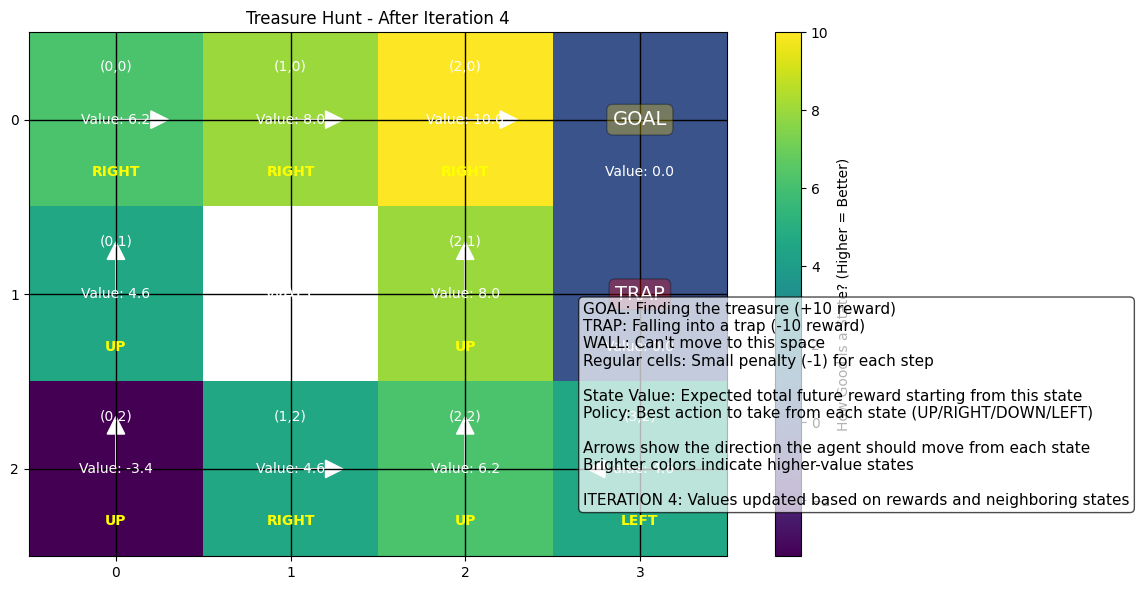


--- ITERATION 5 ---
Updating values for all cells...
Cell (0,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 5.58
    * Total value of this action: 4.58
  - Action RIGHT: Moves to (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action DOWN: Moves to (0,1)
    * Immediate reward: -1, Future value: 4.12
    * Total value of this action: 3.12
  - Action LEFT: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 5.58
    * Total value of this action: 4.58
  All actions evaluated: ['4.58', '6.20', '3.12', '4.58']
  Best action: RIGHT with value 6.20
  Value updated from 6.20 to 6.20 (change: 0.0000)
Cell (1,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action RIGHT: Moves to (2,0)
    * Im

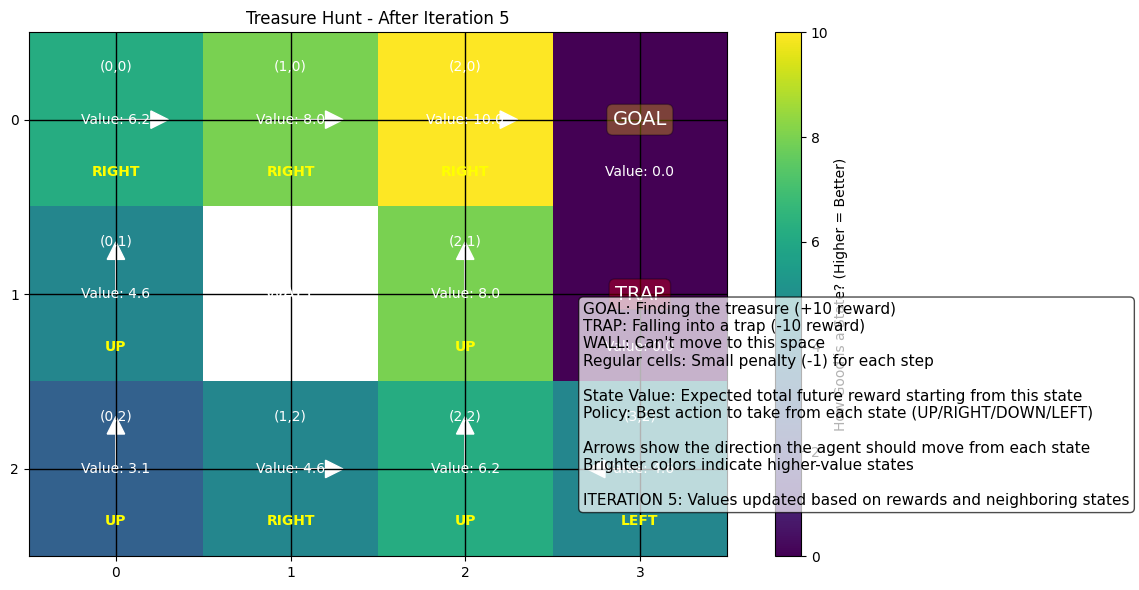


--- ITERATION 6 ---
Updating values for all cells...
Cell (0,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 5.58
    * Total value of this action: 4.58
  - Action RIGHT: Moves to (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action DOWN: Moves to (0,1)
    * Immediate reward: -1, Future value: 4.12
    * Total value of this action: 3.12
  - Action LEFT: Hits boundary/wall, stays at (0,0)
    * Immediate reward: -1, Future value: 5.58
    * Total value of this action: 4.58
  All actions evaluated: ['4.58', '6.20', '3.12', '4.58']
  Best action: RIGHT with value 6.20
  Value updated from 6.20 to 6.20 (change: 0.0000)
Cell (1,0): Trying all possible actions from this state
  - Action UP: Hits boundary/wall, stays at (1,0)
    * Immediate reward: -1, Future value: 7.20
    * Total value of this action: 6.20
  - Action RIGHT: Moves to (2,0)
    * Im

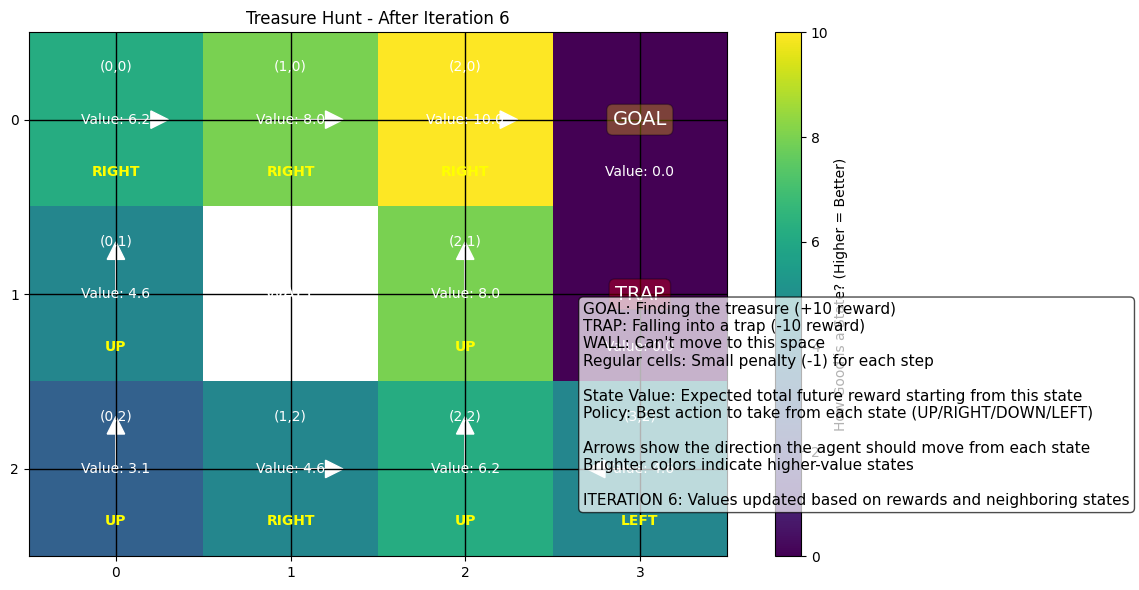


Algorithm converged after 6 iterations!
The values and policy have stabilized (changes are minimal).

FINAL SOLUTION

The algorithm has found the optimal policy (best action in each state):


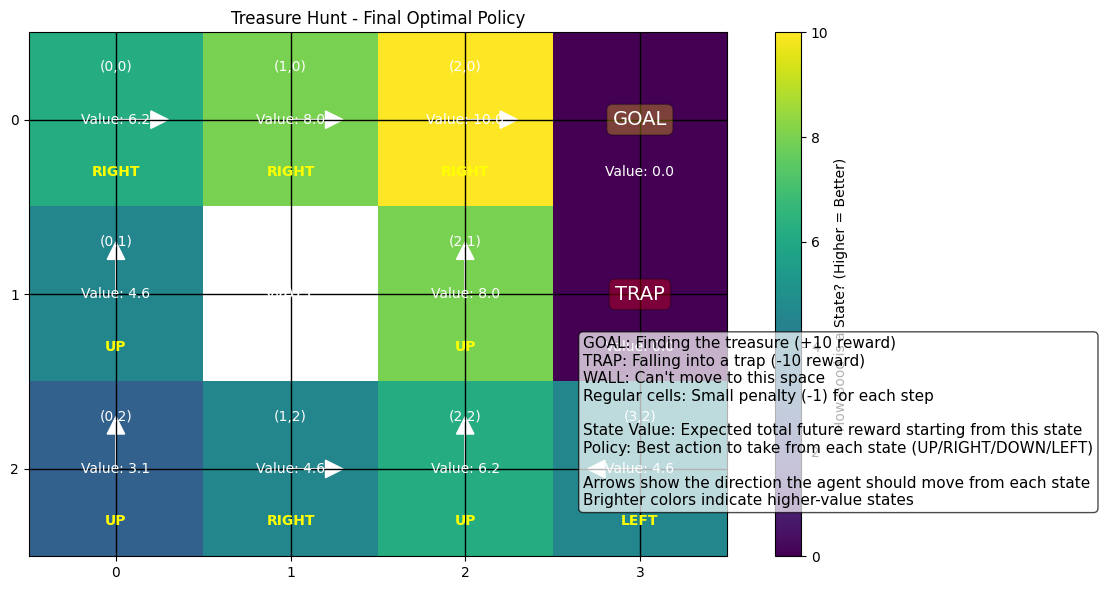


HOW TO INTERPRET THE RESULT:
1. The arrows show the best direction to move from each cell
2. Brighter colors indicate more valuable states (closer to the goal)
3. Following the arrows from any starting point will lead to the goal
4. The agent will avoid the trap and navigate around the wall


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def create_treasure_grid():
    """
    Create a simple 3x4 treasure hunt grid with:
    - A goal/treasure (top-right corner) giving +10 reward
    - A trap (middle-right) giving -10 reward
    - An obstacle (middle-left) that can't be entered
    - Regular cells that give -1 reward (representing the cost of taking time)
    
    Grid layout (visual representation):
    [ 0,0 ][ 0,1 ][ 0,2 ][GOAL]
    [ 1,0 ][WALL][ 1,2 ][TRAP]
    [ 2,0 ][ 2,1 ][ 2,2 ][ 2,3]
    """
    # Initialize grid values with zeros
    values = np.zeros((3, 4))
    
    # Define special states
    goal = (3, 0)      # Treasure: x=3, y=0 (top-right)
    trap = (3, 1)      # Trap: x=3, y=1 (middle-right)
    obstacle = (1, 1)  # Wall: x=1, y=1 (middle-left)
    
    # Mark obstacle as not accessible
    values[obstacle[1], obstacle[0]] = np.nan
    
    # Initialize policy (which action to take in each state)
    # 0: up, 1: right, 2: down, 3: left
    policy = np.zeros((3, 4), dtype=int)
    
    # Return initial setup
    return values, policy, goal, trap, obstacle

def visualize_grid(values, policy, goal, trap, obstacle, iteration=None, title=None):
    """Visualize the grid world with values and policy"""
    plt.figure(figsize=(10, 6))
    
    # Create a masked array to handle the obstacle
    masked_values = np.ma.masked_invalid(values)
    
    # Plot the grid
    plt.imshow(masked_values, cmap='viridis')
    
    # Add cell labels and policy arrows
    action_names = ["UP", "RIGHT", "DOWN", "LEFT"]
    
    for i in range(3):  # rows
        for j in range(4):  # columns
            # Handle special cells (obstacle, goal, trap)
            if (j, i) == obstacle:
                plt.text(j, i, "WALL", ha='center', va='center', fontsize=14, color='white')
            elif (j, i) == goal:
                plt.text(j, i, "GOAL", ha='center', va='center', fontsize=14, color='white',
                        bbox=dict(facecolor='gold', alpha=0.3, boxstyle='round'))
                plt.text(j, i+0.3, f"Value: {values[i, j]:.1f}", ha='center', va='center', 
                        fontsize=10, color='white')
            elif (j, i) == trap:
                plt.text(j, i, "TRAP", ha='center', va='center', fontsize=14, color='white',
                        bbox=dict(facecolor='red', alpha=0.3, boxstyle='round'))
                plt.text(j, i+0.3, f"Value: {values[i, j]:.1f}", ha='center', va='center', 
                        fontsize=10, color='white')
            else:
                # Regular cell: show coordinates and value
                cell_coord = f"({j},{i})"
                plt.text(j, i-0.3, cell_coord, ha='center', va='center', fontsize=10, color='white')
                plt.text(j, i, f"Value: {values[i, j]:.1f}", ha='center', va='center', 
                        fontsize=10, color='white')
                
                # Add policy arrow if not NaN
                if policy is not None and not np.isnan(values[i, j]):
                    action = policy[i, j]
                    
                    # Display action name below the value
                    plt.text(j, i+0.3, action_names[action], ha='center', va='center', 
                            fontsize=10, color='yellow', weight='bold')
                    
                    # Draw arrow showing the policy direction
                    if action == 0:  # up
                        plt.arrow(j, i, 0, -0.2, head_width=0.1, head_length=0.1, fc='white', ec='white')
                    elif action == 1:  # right
                        plt.arrow(j, i, 0.2, 0, head_width=0.1, head_length=0.1, fc='white', ec='white')
                    elif action == 2:  # down
                        plt.arrow(j, i, 0, 0.2, head_width=0.1, head_length=0.1, fc='white', ec='white')
                    elif action == 3:  # left
                        plt.arrow(j, i, -0.2, 0, head_width=0.1, head_length=0.1, fc='white', ec='white')
    
    # Add grid lines
    plt.grid(True, color='black', linestyle='-', linewidth=1)
    plt.xticks(np.arange(4))
    plt.yticks(np.arange(3))
    
    # Set title based on iteration
    if title:
        plt.title(title)
    elif iteration is not None:
        plt.title(f'Treasure Hunt Grid - Iteration {iteration}')
    else:
        plt.title('Treasure Hunt Grid - Final Result')
    
    # Add colorbar to show value scale
    cbar = plt.colorbar(label='State Value')
    cbar.set_label('How Good is a State? (Higher = Better)')
    
    # Add explanation legend
    legend_text = [
        "GOAL: Finding the treasure (+10 reward)",
        "TRAP: Falling into a trap (-10 reward)",
        "WALL: Can't move to this space",
        "Regular cells: Small penalty (-1) for each step",
        "",
        "State Value: Expected total future reward starting from this state",
        "Policy: Best action to take from each state (UP/RIGHT/DOWN/LEFT)",
        "",
        "Arrows show the direction the agent should move from each state",
        "Brighter colors indicate higher-value states"
    ]
    
    # Add iteration explanation if appropriate
    if iteration == 0:
        legend_text.append("")
        legend_text.append("ITERATION 0: Initial values before any updates")
    elif iteration is not None:
        legend_text.append("")
        legend_text.append(f"ITERATION {iteration}: Values updated based on rewards and neighboring states")
    
    # Place the legend
    plt.figtext(0.65, 0.15, '\n'.join(legend_text), fontsize=11, 
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))
    
    plt.tight_layout()
    plt.show()

def value_iteration_with_visualization(gamma=0.9, threshold=0.001, max_iterations=20):
    """
    Find the optimal values and policy using value iteration
    Shows the learning process step by step with visualizations
    """
    # Create the grid world
    values, policy, goal, trap, obstacle = create_treasure_grid()
    
    # Explain the task to the user
    print("=" * 80)
    print("TREASURE HUNT: SOLVING WITH VALUE ITERATION")
    print("=" * 80)
    print("\nIn this example, we're finding the optimal path to the treasure using value iteration.")
    print("The agent starts anywhere in the grid and must find the best way to reach the goal.")
    print("\nHere's what each cell represents:")
    print("- GOAL: The treasure (+10 reward)")
    print("- TRAP: A dangerous pit (-10 reward)")
    print("- WALL: An obstacle that blocks movement")
    print("- Regular cells: Each step costs energy (-1 reward)")
    print("\nWe'll use VALUE ITERATION to find the best action to take from each cell.")
    
    # Show initial grid
    print("\n[INITIAL STATE] All regular cells start with zero values:")
    visualize_grid(values.copy(), policy.copy(), goal, trap, obstacle, 
                  iteration=0, title="Treasure Hunt - Initial State (Iteration 0)")
    
    # Define action effects (dy, dx for up, right, down, left)
    actions = [(-1, 0), (0, 1), (1, 0), (0, -1)]  # up, right, down, left
    action_names = ["UP", "RIGHT", "DOWN", "LEFT"]
    
    # Define rewards
    rewards = np.full((3, 4), -1)  # Default -1 reward per step
    rewards[goal[1], goal[0]] = 10  # Goal reward
    rewards[trap[1], trap[0]] = -10  # Trap penalty
    
    # Mark goal and trap as terminal states
    terminal_states = [goal, trap]
    
    print("\nStarting value iteration algorithm...")
    print("We'll update each cell's value based on the potential future rewards.\n")
    
    # Value iteration
    for iteration in range(1, max_iterations+1):
        max_change = 0
        new_values = values.copy()
        new_policy = policy.copy()
        
        print(f"\n--- ITERATION {iteration} ---")
        print("Updating values for all cells...")
        
        # Update the value of each state
        for i in range(3):  # rows
            for j in range(4):  # columns
                cell_str = f"Cell ({j},{i})"
                
                # Skip terminal states and obstacles
                if (j, i) in terminal_states:
                    if (j, i) == goal:
                        print(f"{cell_str}: GOAL cell - fixed value of {rewards[i, j]}")
                    else:
                        print(f"{cell_str}: TRAP cell - fixed value of {rewards[i, j]}")
                    continue
                elif (j, i) == obstacle:
                    print(f"{cell_str}: WALL cell - not accessible")
                    continue
                
                # Try all possible actions and find the best one
                best_value = float('-inf')
                best_action = 0
                action_values = []
                
                print(f"{cell_str}: Trying all possible actions from this state")
                
                for action_idx, (dy, dx) in enumerate(actions):
                    new_i, new_j = i + dy, j + dx
                    
                    # Check if the new position is valid
                    if (new_i < 0 or new_i >= 3 or 
                        new_j < 0 or new_j >= 4 or 
                        (new_j, new_i) == obstacle):
                        # If invalid, stay in the same position
                        new_i, new_j = i, j
                        print(f"  - Action {action_names[action_idx]}: Hits boundary/wall, stays at ({j},{i})")
                    else:
                        print(f"  - Action {action_names[action_idx]}: Moves to ({new_j},{new_i})")
                    
                    # Calculate the value of taking this action
                    immediate_reward = rewards[new_i, new_j]
                    
                    if (new_j, new_i) in terminal_states:
                        # Terminal states have only immediate reward
                        future_value = 0
                        action_value = immediate_reward
                        print(f"    * Immediate reward: {immediate_reward} (terminal state, no future value)")
                    else:
                        # Non-terminal states include discounted future value
                        future_value = gamma * values[new_i, new_j]
                        action_value = immediate_reward + future_value
                        print(f"    * Immediate reward: {immediate_reward}, Future value: {future_value:.2f}")
                        print(f"    * Total value of this action: {action_value:.2f}")
                    
                    action_values.append(action_value)
                    
                    # Update the best action if needed
                    if action_value > best_value:
                        best_value = action_value
                        best_action = action_idx
                
                # All actions have been evaluated
                print(f"  All actions evaluated: {[f'{v:.2f}' for v in action_values]}")
                print(f"  Best action: {action_names[best_action]} with value {best_value:.2f}")
                
                # Update the state value and policy
                old_value = new_values[i, j]
                new_values[i, j] = best_value
                new_policy[i, j] = best_action
                
                value_change = abs(new_values[i, j] - values[i, j])
                max_change = max(max_change, value_change)
                
                print(f"  Value updated from {old_value:.2f} to {best_value:.2f} (change: {value_change:.4f})")
        
        # Update values for the next iteration
        values = new_values.copy()
        policy = new_policy.copy()
        
        print(f"\nIteration {iteration} complete. Maximum value change: {max_change:.4f}")
        
        # Show grid after this iteration
        visualize_grid(values.copy(), policy.copy(), goal, trap, obstacle, iteration=iteration,
                      title=f"Treasure Hunt - After Iteration {iteration}")
        
        # Check if we've converged (changes are very small)
        if max_change < threshold:
            print(f"\nAlgorithm converged after {iteration} iterations!")
            print("The values and policy have stabilized (changes are minimal).")
            break
        
        # Ask user to continue or skip to the end
        if iteration < max_iterations:
            response = input("\nPress Enter to continue to the next iteration, or type 'end' to skip to final result: ")
            if response.lower() == 'end':
                print("\nSkipping to final result...")
                break
    
    # Show final solution
    print("\n" + "=" * 80)
    print("FINAL SOLUTION")
    print("=" * 80)
    print("\nThe algorithm has found the optimal policy (best action in each state):")
    visualize_grid(values, policy, goal, trap, obstacle, title="Treasure Hunt - Final Optimal Policy")
    
    print("\nHOW TO INTERPRET THE RESULT:")
    print("1. The arrows show the best direction to move from each cell")
    print("2. Brighter colors indicate more valuable states (closer to the goal)")
    print("3. Following the arrows from any starting point will lead to the goal")
    print("4. The agent will avoid the trap and navigate around the wall")
    
    return values, policy, goal, trap, obstacle

# Run value iteration with step-by-step visualization
optimal_values, optimal_policy, goal, trap, obstacle = value_iteration_with_visualization()

Episode 0, Total Reward: -4, Steps: 15, Epsilon: 0.100
Episode 100, Total Reward: 8, Steps: 3, Epsilon: 0.095
Episode 200, Total Reward: 8, Steps: 3, Epsilon: 0.090
Episode 300, Total Reward: 8, Steps: 3, Epsilon: 0.086
Episode 400, Total Reward: 8, Steps: 3, Epsilon: 0.081


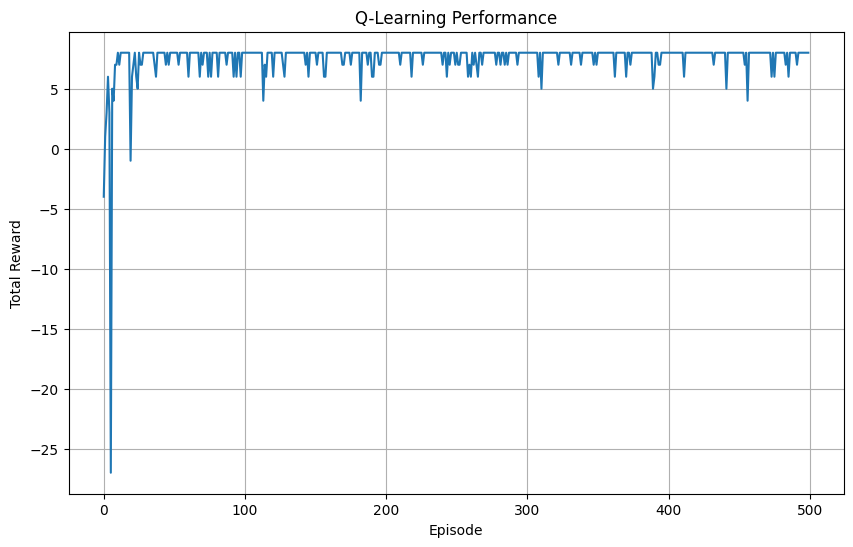

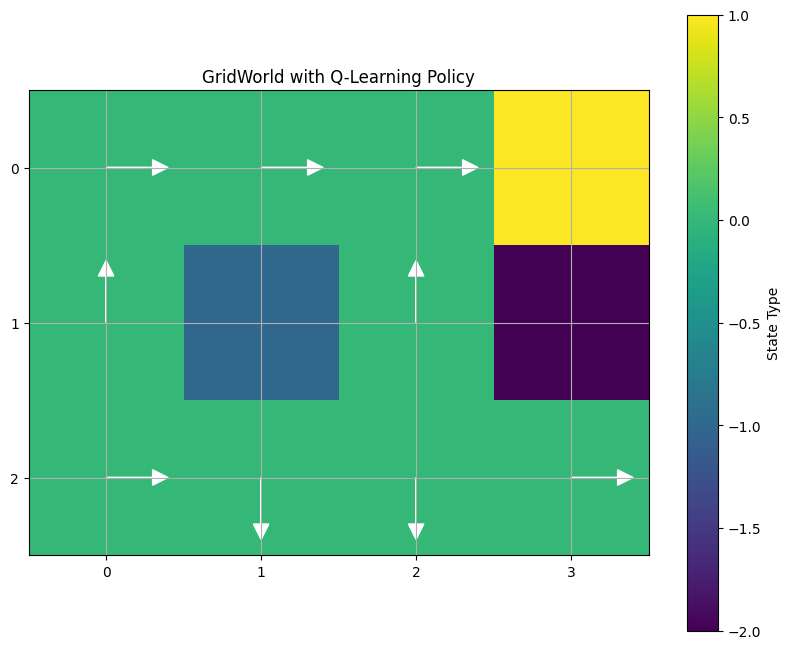

Starting test of learned policy:


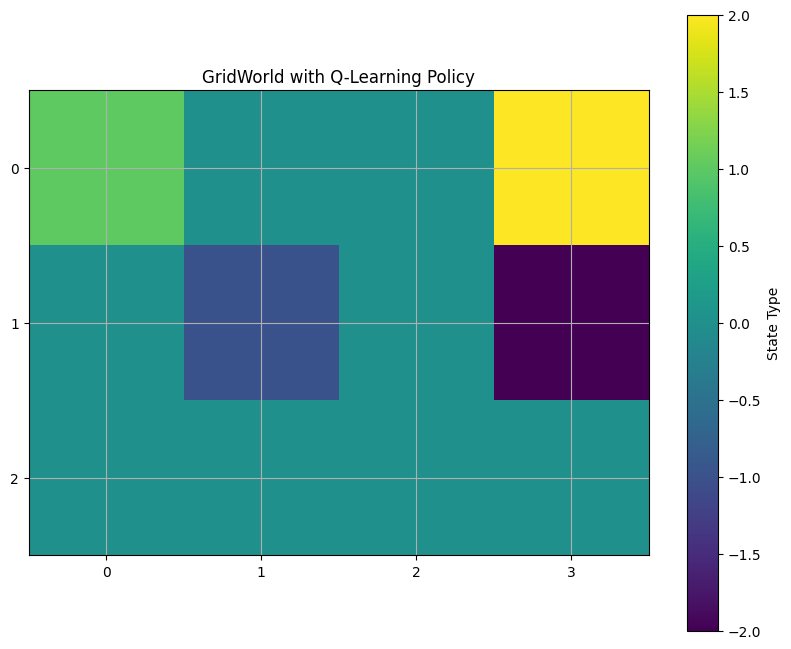

Step 1: Action=1, New State=(1, 0), Reward=-1


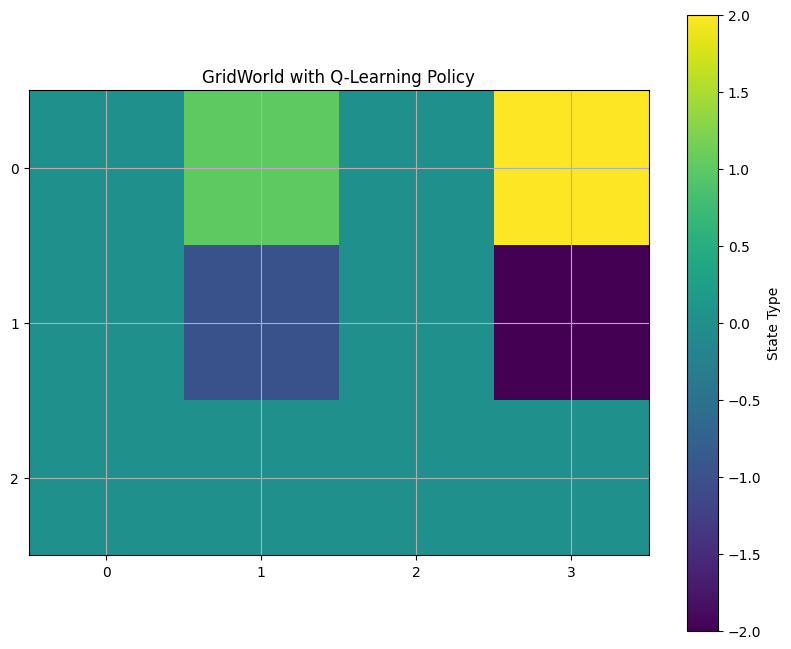

Step 2: Action=1, New State=(2, 0), Reward=-1


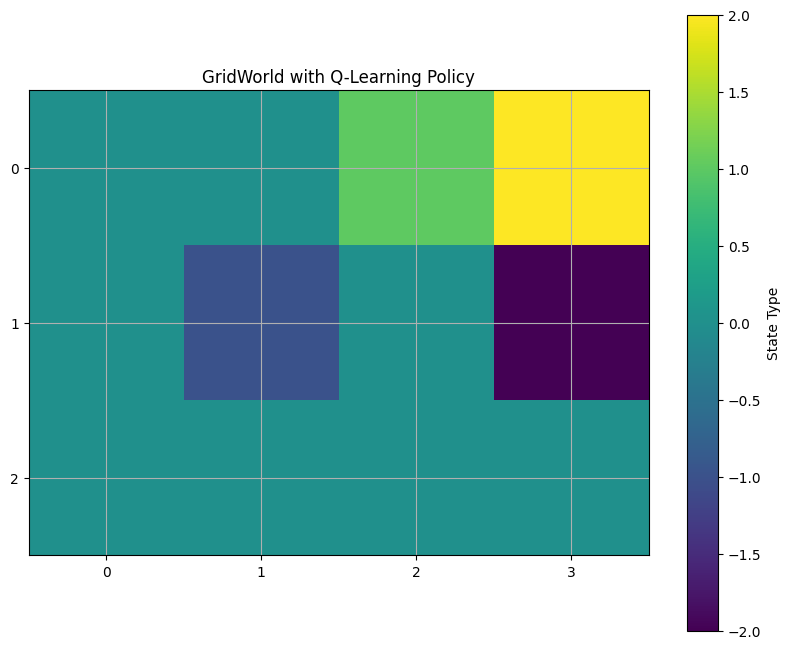

Step 3: Action=1, New State=(3, 0), Reward=10


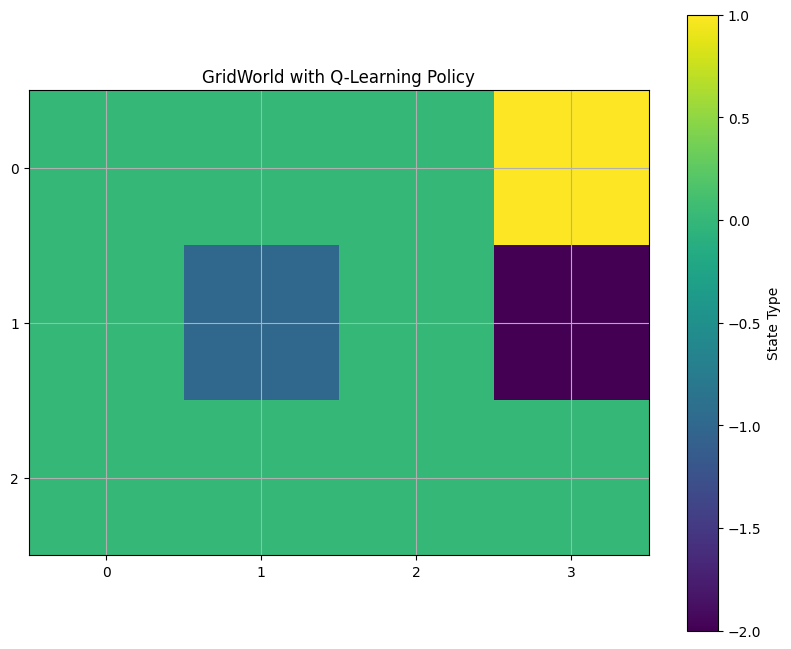

Test completed: Total Reward=8, Steps=3


(8, 3)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict

class QLearningAgent:
    def __init__(self, actions, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.1):
        self.actions = actions  # List of possible actions
        self.alpha = learning_rate  # How quickly we update our Q-values
        self.gamma = discount_factor  # How much we value future rewards
        self.epsilon = exploration_rate  # How often we explore vs. exploit
        
        # Initialize Q-table with zeros for all state-action pairs
        self.q_table = defaultdict(lambda: np.zeros(len(actions)))
        
    def select_action(self, state):
        # Epsilon-greedy action selection
        if random.random() < self.epsilon:
            # Explore: select a random action
            return random.choice(self.actions)
        else:
            # Exploit: select the action with highest Q-value
            return np.argmax(self.q_table[state])
    
    def learn(self, state, action, reward, next_state, done):
        # Q-learning update formula
        
        # Current estimate of state-action value
        current_q = self.q_table[state][action]
        
        if done:
            # If this is a terminal state, there's no next action
            max_next_q = 0
        else:
            # Best possible value from the next state
            max_next_q = np.max(self.q_table[next_state])
        
        # Target Q-value based on reward and future value
        target_q = reward + self.gamma * max_next_q
        
        # Update Q-value towards the target
        self.q_table[state][action] += self.alpha * (target_q - current_q)
        
    def decay_epsilon(self, decay_rate=0.995):
        # Reduce exploration rate over time
        self.epsilon *= decay_rate
        # Ensure epsilon doesn't get too small
        self.epsilon = max(0.01, self.epsilon)

# Enhanced GridWorld environment
class GridWorld:
    def __init__(self, width=4, height=3):
        self.width = width
        self.height = height
        self.agent_position = (0, 0)
        self.goal_position = (3, 0)
        self.trap_position = (3, 1)
        self.obstacles = [(1, 1)]
        
    def reset(self):
        self.agent_position = (0, 0)
        return self.agent_position
    
    def step(self, action):
        # 0: up, 1: right, 2: down, 3: left
        x, y = self.agent_position
        
        if action == 0:  # up
            y = max(0, y-1)
        elif action == 1:  # right
            x = min(self.width-1, x+1)
        elif action == 2:  # down
            y = min(self.height-1, y+1)
        elif action == 3:  # left
            x = max(0, x-1)
            
        # Check if the new position is an obstacle
        if (x, y) in self.obstacles:
            # Stay in the current position
            x, y = self.agent_position
        
        self.agent_position = (x, y)
        
        # Determine reward and done flag
        if self.agent_position == self.goal_position:
            reward = 10
            done = True
        elif self.agent_position == self.trap_position:
            reward = -10
            done = True
        else:
            reward = -1  # Small negative reward for each step
            done = False
            
        return self.agent_position, reward, done
    
    def render(self, q_table=None):
        grid = np.zeros((self.height, self.width))
        
        # Mark special states
        for obstacle in self.obstacles:
            grid[obstacle[1], obstacle[0]] = -1  # Obstacles
        
        grid[self.goal_position[1], self.goal_position[0]] = 2  # Goal
        grid[self.trap_position[1], self.trap_position[0]] = -2  # Trap
        grid[self.agent_position[1], self.agent_position[0]] = 1  # Agent
        
        plt.figure(figsize=(10, 8))
        plt.imshow(grid, cmap='viridis')
        plt.grid(True)
        plt.xticks(np.arange(self.width))
        plt.yticks(np.arange(self.height))
        
        # If Q-table is provided, plot arrows for the policy
        if q_table is not None:
            for i in range(self.width):
                for j in range(self.height):
                    state = (i, j)
                    # Skip if state is obstacle, goal, or trap
                    if state in self.obstacles or state == self.goal_position or state == self.trap_position:
                        continue
                    
                    # Get the best action for this state
                    if state in q_table:
                        action = np.argmax(q_table[state])
                        
                        # Define the arrow direction
                        dx, dy = 0, 0
                        if action == 0:  # up
                            dx, dy = 0, -0.3
                        elif action == 1:  # right
                            dx, dy = 0.3, 0
                        elif action == 2:  # down
                            dx, dy = 0, 0.3
                        elif action == 3:  # left
                            dx, dy = -0.3, 0
                        
                        plt.arrow(i, j, dx, dy, head_width=0.1, head_length=0.1, fc='white', ec='white')
        
        plt.title('GridWorld with Q-Learning Policy')
        plt.colorbar(label='State Type')
        plt.show()

# Train the Q-learning agent
def train_q_learning(env, agent, num_episodes=500):
    rewards_per_episode = []
    
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        steps = 0
        
        while not done and steps < 100:  # Limit steps to avoid infinite loops
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)
            
            agent.learn(state, action, reward, next_state, done)
            
            state = next_state
            total_reward += reward
            steps += 1
        
        rewards_per_episode.append(total_reward)
        
        # Decay exploration rate
        if episode % 10 == 0:
            agent.decay_epsilon()
        
        # Print progress
        if episode % 100 == 0:
            print(f"Episode {episode}, Total Reward: {total_reward}, Steps: {steps}, Epsilon: {agent.epsilon:.3f}")
    
    return rewards_per_episode

# Create environment and agent
env = GridWorld()
agent = QLearningAgent(actions=[0, 1, 2, 3])

# Train the agent
rewards = train_q_learning(env, agent, num_episodes=500)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.title('Q-Learning Performance')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

# Visualize the learned policy
env.render(agent.q_table)

# Test the learned policy
def test_policy(env, agent, render=True):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0
    
    if render:
        print("Starting test of learned policy:")
        env.render()
    
    while not done and steps < 100:
        # Always choose the best action (no exploration)
        action = np.argmax(agent.q_table[state])
        next_state, reward, done = env.step(action)
        
        total_reward += reward
        steps += 1
        state = next_state
        
        if render:
            print(f"Step {steps}: Action={action}, New State={state}, Reward={reward}")
            env.render()
    
    print(f"Test completed: Total Reward={total_reward}, Steps={steps}")
    return total_reward, steps

# Test the learned policy
test_policy(env, agent)

In [15]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create the CartPole environment
env = gym.make("CartPole-v1")

# Define the DQN network architecture
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)  # First fully connected layer
        self.fc2 = nn.Linear(64, 64)         # Second fully connected layer
        self.fc3 = nn.Linear(64, action_size) # Output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation to first layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to second layer
        return self.fc3(x)       # Return Q-values for each action

Using device: cpu


In [16]:
# Define the replay buffer for experience replay
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)  # Fixed-size buffer
    
    def add(self, state, action, reward, next_state, done):
        # Add experience to buffer
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        # Randomly sample a batch of experiences
        batch = random.sample(self.buffer, batch_size)
        
        # Separate the components of the experiences
        states, actions, rewards, next_states, dones = zip(*batch)
        
        # Convert to PyTorch tensors
        states = torch.FloatTensor(np.array(states)).to(device)
        actions = torch.LongTensor(np.array(actions)).to(device)
        rewards = torch.FloatTensor(np.array(rewards)).to(device)
        next_states = torch.FloatTensor(np.array(next_states)).to(device)
        dones = torch.FloatTensor(np.array(dones)).to(device)
        
        return states, actions, rewards, next_states, dones
    
    def __len__(self):
        return len(self.buffer)

In [17]:
# Define the DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        
        # Main Q-network for making decisions
        self.q_network = DQN(state_size, action_size).to(device)
        
        # Target Q-network for stable learning targets
        self.target_network = DQN(state_size, action_size).to(device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.target_network.eval()  # Set to evaluation mode
        
        # Hyperparameters
        self.gamma = 0.99           # Discount factor
        self.epsilon = 1.0          # Initial exploration rate
        self.epsilon_min = 0.01     # Minimum exploration rate
        self.epsilon_decay = 0.995  # Epsilon decay rate
        self.learning_rate = 0.001  # Learning rate
        self.update_target_frequency = 10  # How often to update target network
        
        # Replay buffer
        self.replay_buffer = ReplayBuffer(capacity=10000)
        self.batch_size = 64
        
        # Optimizer
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=self.learning_rate)
        
    def select_action(self, state):
        # Epsilon-greedy action selection
        if random.random() < self.epsilon:
            return random.randrange(self.action_size)  # Explore: random action
        else:
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            with torch.no_grad():
                action_values = self.q_network(state)
            return torch.argmax(action_values).item()  # Exploit: best action
    
    def learn(self):
        # If not enough samples in buffer, skip learning
        if len(self.replay_buffer) < self.batch_size:
            return
        
        # Sample a batch from the replay buffer
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(self.batch_size)
        
        # Get Q-values for current states and chosen actions
        q_values = self.q_network(states).gather(1, actions.unsqueeze(1)).squeeze(1)
        
        # Get maximum Q-values for next states using the target network
        next_q_values = self.target_network(next_states).max(1)[0]
        
        # Calculate target Q-values
        targets = rewards + self.gamma * next_q_values * (1 - dones)
        
        # Calculate loss
        loss = F.mse_loss(q_values, targets)
        
        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # Decay epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)
        
        return loss.item()
    
    def update_target_network(self):
        # Update the target network with the main network's weights
        self.target_network.load_state_dict(self.q_network.state_dict())
    
    def save(self, filename):
        # Save the trained model
        torch.save(self.q_network.state_dict(), filename)
    
    def load(self, filename):
        # Load a pre-trained model
        self.q_network.load_state_dict(torch.load(filename))
        self.target_network.load_state_dict(self.q_network.state_dict())

In [18]:
# Training function
def train_dqn(env, agent, num_episodes=500):
    scores = []
    losses = []
    eps_history = []
    
    print("Starting DQN training...")
    for episode in range(num_episodes):
        state, _ = env.reset()  # Reset environment at start of episode
        score = 0
        done = False
        
        while not done:
            # Select and perform an action
            action = agent.select_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Store the transition in the replay buffer
            agent.replay_buffer.add(state, action, reward, next_state, done)
            
            # Learn from experience
            loss = agent.learn()
            if loss:
                losses.append(loss)
            
            # Move to the next state
            state = next_state
            score += reward
        
        # Update the target network periodically
        if episode % agent.update_target_frequency == 0:
            agent.update_target_network()
            print(f"Episode {episode}: Updated target network")
        
        # Save statistics
        scores.append(score)
        eps_history.append(agent.epsilon)
        
        # Print progress
        if episode % 10 == 0:
            avg_score = np.mean(scores[-10:])
            print(f"Episode {episode}: Score = {score}, Average Score = {avg_score:.2f}, Epsilon = {agent.epsilon:.2f}")
        
        # If we achieve a high enough score, consider the task solved
        if np.mean(scores[-100:]) >= 195.0:
            print(f"Environment solved in {episode} episodes!")
            agent.save("dqn_cartpole_solved.pth")
            break
    
    return scores, losses, eps_history

In [19]:
# Test function to see how our trained agent performs
def test_agent(env, agent, num_episodes=10, render=False):
    scores = []
    
    for episode in range(num_episodes):
        state, _ = env.reset()
        score = 0
        done = False
        
        while not done:
            # Choose the best action (no exploration)
            state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
            with torch.no_grad():
                action_values = agent.q_network(state_tensor)
            action = torch.argmax(action_values).item()
            
            # Take the action
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Update state and score
            state = next_state
            score += reward
            
            # Render the environment if requested
            if render:
                env.render()
        
        scores.append(score)
        print(f"Test Episode {episode+1}: Score = {score}")
    
    print(f"Average Test Score: {np.mean(scores):.2f}")
    return scores

Starting DQN training...
Episode 0: Updated target network
Episode 0: Score = 9.0, Average Score = 9.00, Epsilon = 1.00


Episode 10: Updated target network
Episode 10: Score = 14.0, Average Score = 20.00, Epsilon = 0.48
Episode 20: Updated target network
Episode 20: Score = 16.0, Average Score = 15.40, Epsilon = 0.22
Episode 30: Updated target network
Episode 30: Score = 93.0, Average Score = 31.20, Epsilon = 0.05
Episode 40: Updated target network
Episode 40: Score = 43.0, Average Score = 37.00, Epsilon = 0.01
Episode 50: Updated target network
Episode 50: Score = 100.0, Average Score = 94.50, Epsilon = 0.01
Episode 60: Updated target network
Episode 60: Score = 126.0, Average Score = 130.60, Epsilon = 0.01
Episode 70: Updated target network
Episode 70: Score = 149.0, Average Score = 155.40, Epsilon = 0.01
Episode 80: Updated target network
Episode 80: Score = 175.0, Average Score = 153.50, Epsilon = 0.01
Episode 90: Updated target network
Episode 90: Score = 185.0, Average Score = 177.70, Epsilon = 0.01
Episode 100: Updated target network
Episode 100: Score = 158.0, Average Score = 163.40, Epsilon = 0.

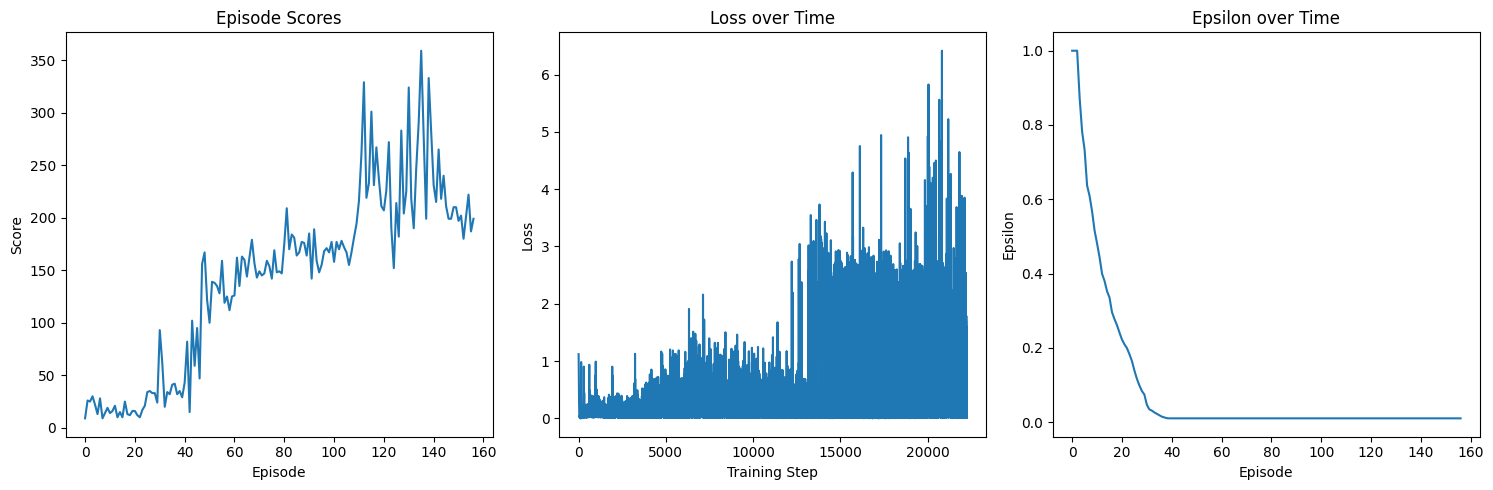

Test Episode 1: Score = 216.0
Test Episode 2: Score = 195.0
Test Episode 3: Score = 212.0
Test Episode 4: Score = 191.0
Test Episode 5: Score = 236.0
Test Episode 6: Score = 201.0
Test Episode 7: Score = 239.0
Test Episode 8: Score = 203.0
Test Episode 9: Score = 202.0
Test Episode 10: Score = 193.0
Average Test Score: 208.80


In [20]:
# Main execution
state_size = env.observation_space.shape[0]  # 4 for CartPole
action_size = env.action_space.n  # 2 for CartPole (left or right)

agent = DQNAgent(state_size, action_size)

# Train the agent
scores, losses, eps_history = train_dqn(env, agent, num_episodes=500)

# Plot the training results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(scores)
plt.title('Episode Scores')
plt.xlabel('Episode')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(losses)
plt.title('Loss over Time')
plt.xlabel('Training Step')
plt.ylabel('Loss')

plt.subplot(1, 3, 3)
plt.plot(eps_history)
plt.title('Epsilon over Time')
plt.xlabel('Episode')
plt.ylabel('Epsilon')

plt.tight_layout()
plt.show()

# Test the trained agent
test_scores = test_agent(env, agent)

# Close the environment
env.close()